# <span style='color:blue'> Seeds Project </span>

## Domain
Agriculture; used for practice of classification concepts in Python

## Problem Statement
We will train a classification model with a seven-dimension measurement.

## Metric
We will use accuracy to assess the performance of the model

## Data Summary
n: 210
p: 7

*Attributes: *
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove.


*Wheat Types:* <br>
Kama [1] <br>
Rosa [2] <br>
Canadian [3]

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import seaborn as sns
import math

In [2]:
SEEDS_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
Seeds_Data = pd.read_csv(SEEDS_DATA_URL, sep='', delimiter=r"\s+",header=None)
Seeds_Data.columns = ['area','perimeter','compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove','target']
Seeds_Data

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1


In [3]:
Seeds_Data.describe()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


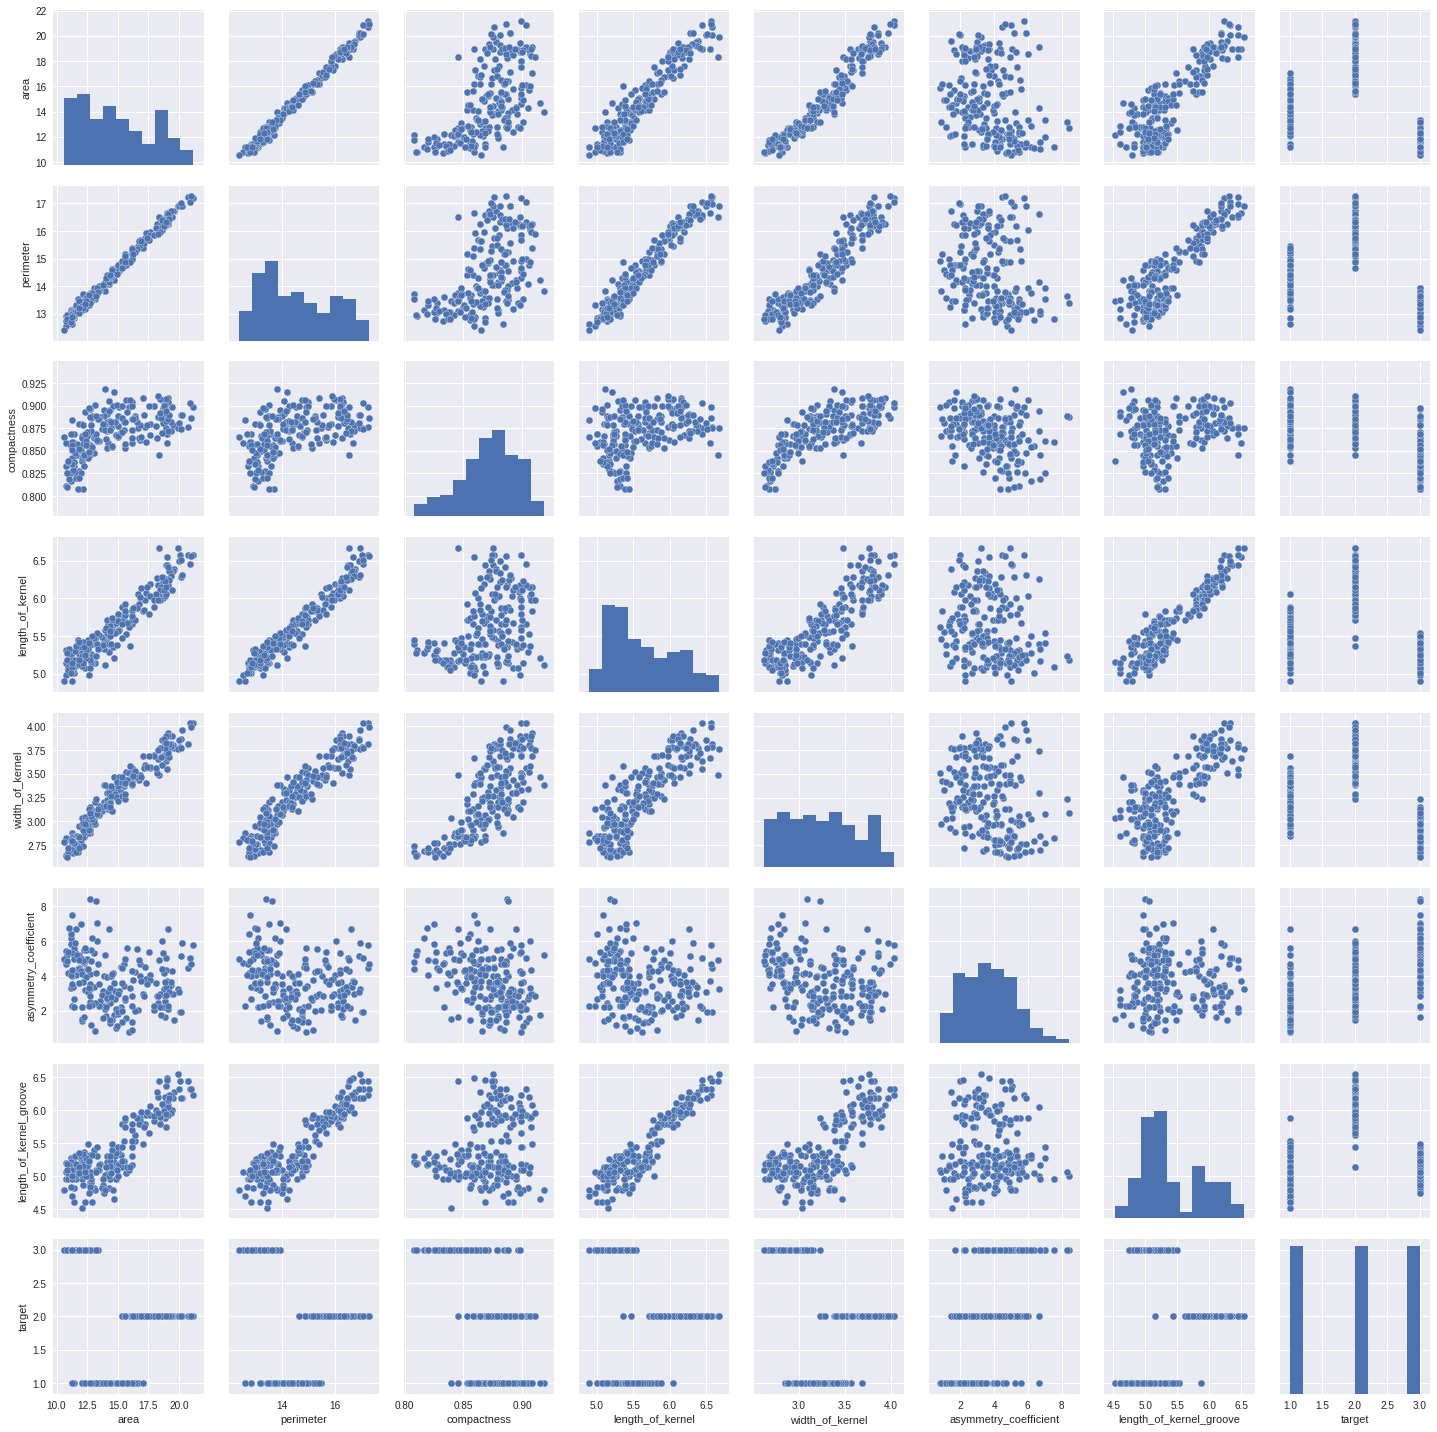

In [4]:
sns.pairplot(Seeds_Data)

<br>
## Observations

The following features seem to have a strong linear correlation with each other:
- area and perimeter/width of kernel/length of kernel/length of kernel groove
- perimeter and width of kernel/length of kernel/length of kernel groove
- width of kernel and length of kernel
- length of kernel groove and length of kernel groove

The following seem to seperate the types of wheat pretty well:
- area
- perimeter
- length/width of kernel
- length of kernel groove

<br>
<br>
## Plan

We will use BIC to select the optimal combination of features (greedy algorithm) and then use those features to train a model to for classifying wheat type from the seeds dataset.
<br>
<br>

### 1. Train Test Split without dropping the features

In [5]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()
features = Seeds_Data.drop('target', axis=1)
target = Seeds_Data[['target']]
target_numerical = LabelEncoder().fit_transform(Seeds_Data['target'])

In [6]:
(features_train,
 features_validation,
 target_train,
 target_validation) = train_test_split(features, target_numerical, random_state=10)

In [7]:
lrm.fit(features_train, target_train)
target_prediction = lrm.predict(features_validation)
target_prediction

array([0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0,
       1, 2, 1, 0, 2, 2, 2])

In [8]:
target_validation

array([0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0,
       1, 0, 1, 0, 2, 2, 0])

<br>

In [9]:
def accuracy(actual, predicted):
    return sum(np.abs(actual - predicted))/len(actual)

In [10]:
#Mean Absolute Error
accuracy(target_validation, target_prediction)

0.16981132075471697

### Dummy Classifier

We can use the dummy classifier as a baseline to see if this error is acceptable.

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score    
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(features_train,target_train)    
dummy_classifier.score(features_validation, target_validation)   #calculating accuracy of the dummy classifier

0.26415094339622641

The model with all features is better than what the error from the dummy classifier, but let's see if feature elimination will help us get an even better error term.

<br>
<br>
### 2. Model Selection

We will now try using feature elimination to see if we can get a better model. I will use BIC to evaluate which is the best combination of features for the model. Since there are a good amount of combinations (6 factorial), let's try removing just one feature first.
<br>
<br>

In [12]:
#BIC Function
from sklearn.metrics import log_loss
def BIC(model,data,target):
    n=data.shape[0]
    p=data.shape[1]
    complexity=np.log(n)*(p+1)
    model.fit(data,target)
    pred=model.predict_proba(data)
    likelihood=-2*log_loss(target,pred)
    return complexity - likelihood

In [13]:
#BIC with all features
BIC(lrm,features,target)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


43.271406839816628

<br>
#### Backwards Elimination (Manual)

I used R to check out feature combinations with 1,2, and 3 features removed. Of the combinations I tested, the one with the lowest BIC turned out to be the following (See R Notebook for details):

*area , perimeter , compactness , length_of_kernel, asymmetry_coefficient , length_of_kernel_groove*
<br>

Let's see how this model turns out.

In [14]:
features_m2c = features[['area','perimeter','compactness','length_of_kernel','asymmetry_coefficient','length_of_kernel_groove']]
BIC(lrm,features_m2c,target)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


37.9327849033889

In [15]:
(features_train,
 features_validation,
 target_train,
 target_validation) = train_test_split(features_m2c, target_numerical, random_state=10)

lrm.fit(features_train, target_train)
target_prediction = lrm.predict(features_validation)
accuracy(target_validation, target_prediction)

0.16981132075471697

#### Feature Addition

For a more comprehensive list of combinations, I'm going to use itertools to generate the powerset of possible combinations and look for the lowest BIC.

In [16]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

combos = list(powerset(features.columns))
combosdf = pd.DataFrame(combos)

In [17]:
combos = list(filter(len, combos))
BIC_values = [BIC(lrm,features[list(combos[i])], target) for i in range(0,127)]
combosdf = pd.DataFrame(BIC_values,columns=['BIC_Values'])
combosdf['features'] = combos
combosdf[['features','BIC_Values']].sort_values(by=['BIC_Values']).head()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,features,BIC_Values
0,"(area,)",12.115507
4,"(width_of_kernel,)",12.420367
1,"(perimeter,)",12.503907
5,"(asymmetry_coefficient,)",12.530798
6,"(length_of_kernel_groove,)",12.535999


In [18]:
combosdf[['features','BIC_Values']].sort_values(by=['BIC_Values']).tail()

,features,BIC_Values
124,"(area, compactness, length_of_kernel, width_of...",37.996738
120,"(area, perimeter, compactness, length_of_kerne...",38.034295
119,"(area, perimeter, compactness, length_of_kerne...",38.100161
125,"(perimeter, compactness, length_of_kernel, wid...",38.394061
126,"(area, perimeter, compactness, length_of_kerne...",43.271407


The results here are quite shocking, as it is basically saying a model fitted with just area as the sole feature outperforms every other combination according to BIC. The rest of the observations also suggest minimal features is ideal.

In [19]:
(features_train,
 features_validation,
 target_train,
 target_validation) = train_test_split(features[['area']], target_numerical, random_state=10)

lrm.fit(features_train, target_train)
target_prediction = lrm.predict(features_validation)
accuracy(target_validation, target_prediction)

0.45283018867924529

But the error tells us a different story. What I think is happening is that BIC can sometimes choose an oversimplistic model and thus cause underfitting.

<br>
#### Backwards Elimination (RFE)
Using the RFE method available in ```scikitlearn```, I will get a point of comparison for the BIC model selection method.

In [20]:
from sklearn.feature_selection import RFE

rfe = RFE(lrm, 4)
rfe = rfe.fit(features,target)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
d = {'features':features.columns,'support':rfe.support_,'ranking':rfe.ranking_}
RFEdf = pd.DataFrame(data=d)

# print(list(features.columns))
# print(rfe.support_)
# print(rfe.ranking_)

RFEdf

,features,ranking,support
0,area,1,True
1,perimeter,1,True
2,compactness,4,False
3,length_of_kernel,1,True
4,width_of_kernel,2,False
5,asymmetry_coefficient,3,False
6,length_of_kernel_groove,1,True


Choosing the 4 features RFE tells us to pick, we can check for its error.

In [22]:
(features_train,
 features_validation,
 target_train,
 target_validation) = train_test_split(features[['area','perimeter','length_of_kernel','length_of_kernel_groove']], target_numerical, random_state=10)

lrm.fit(features_train, target_train)
target_prediction = lrm.predict(features_validation)
accuracy(target_validation, target_prediction)
# lrm.score(features_train,target_train)

0.13207547169811321

And we actually get a better error term than the BIC models! It seems like RFE's usage of coefficients and feature importance(?) is helping.

In [23]:
rfe_b = RFE(lrm, 3)
rfe_b = rfe_b.fit(features,target)
print(rfe_b.support_)
print(rfe_b.ranking_)

(features_train,
 features_validation,
 target_train,
 target_validation) = train_test_split(features[['area','perimeter','length_of_kernel_groove']], target_numerical, random_state=10)

lrm.fit(features_train, target_train)
target_prediction = lrm.predict(features_validation)
print('Error Term:', accuracy(target_validation, target_prediction))

[ True  True False False False False  True]
[1 1 5 2 3 4 1]
Error Term: 0.132075471698


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<br>

In [24]:
rfe_c = RFE(lrm,5)
rfe_c = rfe_c.fit(features,target)
print(rfe_c.support_)
print(rfe_c.ranking_)
(features_train,
 features_validation,
 target_train,
 target_validation) = train_test_split(features[['area','perimeter','length_of_kernel_groove','length_of_kernel','width_of_kernel']], target_numerical, random_state=10)

lrm.fit(features_train, target_train)
target_prediction = lrm.predict(features_validation)
accuracy(target_validation, target_prediction)
print('Error Term:', accuracy(target_validation, target_prediction))

[ True  True False  True  True False  True]
[1 1 3 1 1 2 1]
Error Term: 0.132075471698


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<br>

In [25]:
#Built-in Score as extra metric for comparison
print('3 features:', rfe_b.score(features,target))
print('4 features:', rfe.score(features,target))
print('5 features:', rfe_c.score(features,target))

3 features: 0.919047619048
4 features: 0.919047619048
5 features: 0.92380952381
